In [1]:
import torch.optim as optim
import gymnasium as gym

from simple_ppo import PPO
from simple_ppo.policy import ContinuMlpPolicy
from simple_ppo.utils import evaluate, plot

In [2]:
policy = ContinuMlpPolicy(state_dim=17, action_dim=6, sd_init=0.4, sd_rng=(0.03, 0.5))
optimizer = optim.Adam(policy.parameters(), lr=0.0001)

In [3]:
env = gym.make('HalfCheetah-v4', render_mode=None, max_episode_steps=256)
env_eval = gym.make('HalfCheetah-v4', render_mode=None)

agent = PPO(policy, optimizer, env, env_eval,
            gamma=0.99, gae_lambda=0.95, n_step=2048, batch_size=64, n_epochs=16,
            clip_eps=0.1, vf_coef=1.0, ent_coef=0.001, max_grad_norm=1.0,
            eval_num=4)

log = agent.train(total_timesteps=500000)

env.close()
env_eval.close()

| timestep   2048 | policy   +0.443 | value   +2.087 | entropy   +0.503 | reward   -67.9 |
| timestep   4096 | policy   +0.002 | value   +2.004 | entropy   +0.502 | reward   -24.3 |
| timestep   6144 | policy   +0.505 | value   +1.646 | entropy   +0.503 | reward    -6.2 |
| timestep   8192 | policy   -0.790 | value   +1.846 | entropy   +0.502 | reward   -10.8 |
| timestep  10240 | policy   -1.063 | value   +2.112 | entropy   +0.492 | reward    +9.3 |
| timestep  12288 | policy   -0.491 | value   +2.105 | entropy   +0.482 | reward   +32.1 |
| timestep  14336 | policy   -2.065 | value   +2.292 | entropy   +0.472 | reward   +52.2 |
| timestep  16384 | policy   -0.908 | value   +2.502 | entropy   +0.461 | reward   +65.4 |
| timestep  18432 | policy   -1.349 | value   +3.155 | entropy   +0.454 | reward  +102.7 |
| timestep  20480 | policy   -1.695 | value   +2.710 | entropy   +0.445 | reward  +213.6 |
| timestep  22528 | policy   -1.809 | value   +2.678 | entropy   +0.431 | reward  +383.6 |

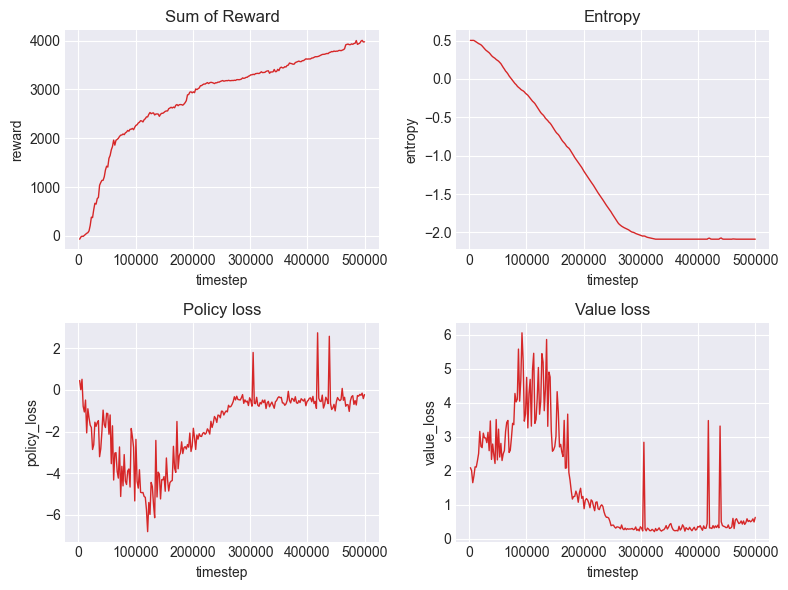

In [4]:
plot(log)

In [5]:
env = gym.make('HalfCheetah-v4', render_mode=None)
mean, std = evaluate(policy, env, eval_num=32)
env.close()

print('mean : %f    std : %f'%(mean, std))

c:\Users\gram15\Documents\1 My Folder\Projects\SimplePPO\venv\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


mean : 3976.770508    std : 12.688578


In [9]:
env = gym.make('HalfCheetah-v4', render_mode='human')
evaluate(policy, env, eval_num=1, deterministic=True)
env.close()